## Проект по теме "Прогнозирование наличия сердечно-сосудистых заболеваний на основе характеристик пациентов"

Датасет представляет собой .csv файл, содержащий следующие поля:

* id: идентификатор для каждого человека в наборе данных;
* age: возраст человека (в днях);
* gender: пол (1 для женщин, 2 для мужчин);
* height: рост в сантиметрах;
* weight: вес в килограммах;
* ap_hi: систолическое артериальное давление (измеряется в мм рт.ст.);
* ap_lo: диастолическое артериальное давление (измеряется в мм рт.ст.);
* cholesterol: уровень холестерина (1 – в норме, 2 – выше нормы, 3 –
значительно выше нормы);
* gluc: уровень глюкозы (1 – в норме, 2 – выше нормы, 3 – значительно выше
нормы);
* smoke: курит ли человек (0 – нет, 1 – да);
* alco: употребляет ли человек алкоголь (0 – нет, 1 – да);
* active: является ли человек физически активным (0 – нет, 1 – да);
* cardio: наличие сердечно-сосудистых заболеваний (0 – нет, 1 – да).

Задачей является построить модель, предсказывающую наличие сердечно-сосудистых заболеваний.
Вам необходимо реализовать все дальнейшие шаги, обучить модель и оценить её качество.

## Задание 1: загрузка файла и проверка пропущенных значений (5 баллов)

Откройте данные и изучите их: есть ли пропущенные значения? Прокомментируйте результат. Если пропущенные значения есть - удалите строки с ними.

In [960]:
# работа с данными
import pandas as pd
import numpy as np
import joblib

# визуализация данных
import seaborn as sns
import matplotlib.pyplot as plt

# машинное обучение
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [961]:
df = pd.read_csv("cvd.csv") # загружаем данные с репозитория

In [962]:
df.shape # смотрим размерность

(70000, 13)

In [963]:
df.head(10) #первые 10 значений шапки датасета

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [964]:
df.info() # сводная информация по датасету

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [965]:
# установим пакет дял визуального анализа пропусков
!pip install missingno
import missingno


<Axes: >

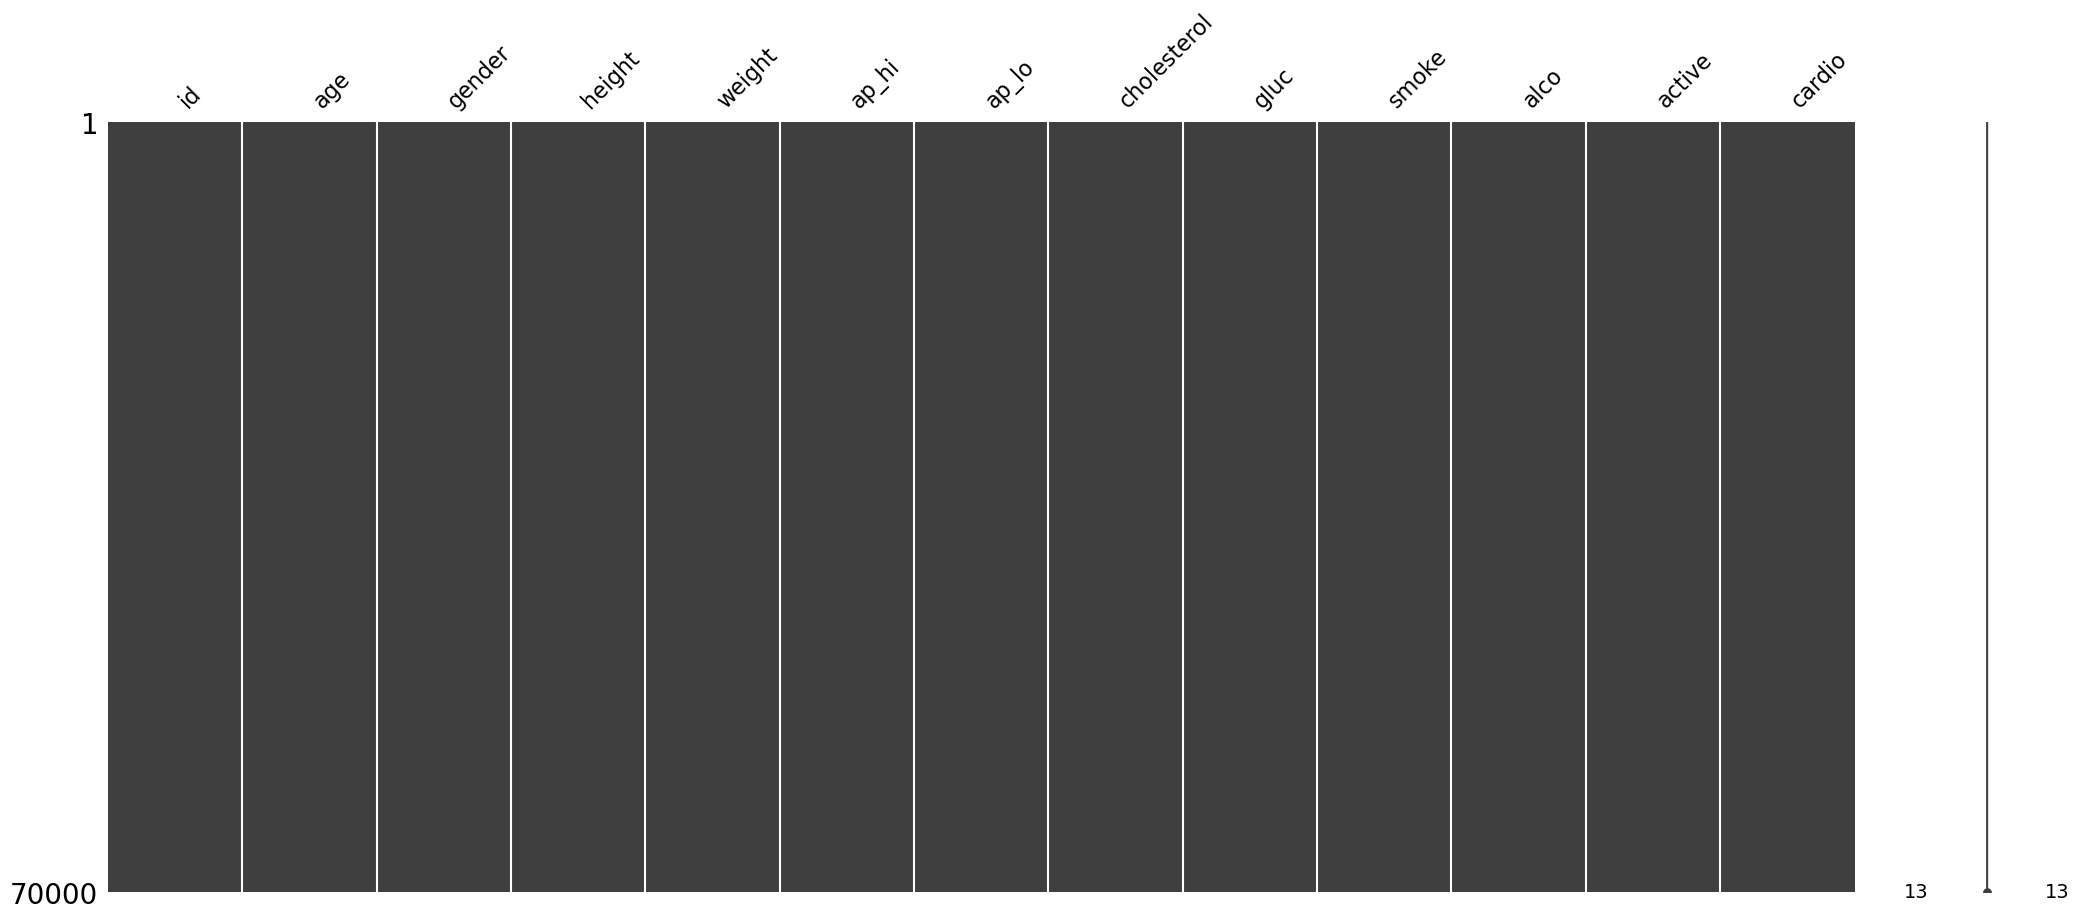

In [966]:
missingno.matrix(df) #визуальный анализ на пропуски

In [967]:
# проверка пропусков 
missing_values_summary = df.isnull().sum()

# саммари
missing_values_summary

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [968]:
# проверка на дубликаты
df.duplicated().sum()

0

### В наборе нет пропущенных значений и дубликатов, можем продолжить работать

In [969]:
df.describe().transpose() #беглый обзор на данные

,count,mean,std,min,25%,50%,75%,max
id,70000.0,49972.419900,28851.302323,0.0,25006.75,50001.5,74889.25,99999.0
age,70000.0,19468.865814,2467.251667,10798.0,17664.00,19703.0,21327.00,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.00,1.0,2.00,2.0
height,70000.0,164.359229,8.210126,55.0,159.00,165.0,170.00,250.0
weight,70000.0,74.205690,14.395757,10.0,65.00,72.0,82.00,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.00,120.0,140.00,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.00,80.0,90.00,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.00,1.0,2.00,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.00,1.0,1.00,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.00,0.0,0.00,1.0


# Как видим, есть проблемы:
 1. age как минимум нужно выровнять, среднее 19468?
 2. пол можно выправить на 1 или 0 для бинарного отображения
 3. рост, вес требует рассмотрения на вопрос выбросов, это будет влиять на всё модель
 4. АД и верхнее и нижнее имеет очевидные выбросы
 5. холестерин требует перевод в dummy переменную он сдвинет корреляционно модель, так как явно эти показатели рангового типа
 6. глюкоза аналогично
 7. курение бинарный признак
 8. алкоголь бинарный
 9. активность бинарный
 10. таргет переменная cardio

In [970]:
df.drop(columns='id', inplace=True) # удаляем столбец id 

In [971]:
df_pre = df.copy() # создадим копию для преобработки данных

In [972]:
from sklearn.preprocessing import MinMaxScaler #преобразуем странные значения возраста в норамльный вид, без потери информативности

scaler = MinMaxScaler(feature_range=(0,100))

df_pre['age'] = scaler.fit_transform(df_pre[['age']])


In [973]:
df_pre['gender'] = df_pre['gender'].apply(lambda x: 0 if x == 1 else 1) #преобразуем в бинарный вид признак пола

In [974]:
def replace_outliers(column): # функция, чтобы выровнять выбросы для 'height', 'weight', 'ap_hi', 'ap_lo'
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 6 * IQR # коэфициент нужно подобрать, чтобы верхняя граница была не летальной и физиологичной после функции
    return column.apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))
    
col_pre = ['height', 'weight', 'ap_hi', 'ap_lo']  # подадим список интересующих нас столбцов
df_pre[col_pre] = df_pre[col_pre].apply(replace_outliers)

1. 'height' разброс от 142 до 236 см возможен, иметь другие границы - выбросы сдвинут результат адекватной модели
2. 'weight' бывают, конечно веса более 3 центнеров, но скорее выше значения 240 - это выброс
3. 'ap_hi' включаем логику, верхнее АД выше 260 точно бырос, либо пациенту нужна экстренная помощь
4. 'ap_lo' аналогично ниже 55 будет утягивать и показатели верхнего АД, опираемся на логику физиологичности

In [1000]:
df_mod = pd.get_dummies(df_pre, columns= ['cholesterol', 'gluc'], drop_first = True) # drop_first чтобы столбцы не исчезли

In [1002]:
#df_final = pd.concat([df_pre, df_mod], axis = 1)

In [1004]:
df_pre.describe().transpose() 

,count,mean,std,min,25%,50%,75%,max
age,70000.0,67.137947,19.103768,0.0,53.162989,68.950832,81.525358,100.0
gender,70000.0,0.349571,0.476838,0.0,0.000000,0.000000,1.000000,1.0
height,70000.0,164.420157,7.869652,142.5,159.000000,165.000000,170.000000,236.0
weight,70000.0,74.209398,14.380108,39.5,65.000000,72.000000,82.000000,184.0
ap_hi,70000.0,126.999586,17.415311,90.0,120.000000,120.000000,140.000000,260.0
ap_lo,70000.0,82.517743,12.084972,65.0,80.000000,80.000000,90.000000,150.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.000000,1.000000,2.000000,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.000000,1.000000,1.000000,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.000000,0.000000,0.000000,1.0
alco,70000.0,0.053771,0.225568,0.0,0.000000,0.000000,0.000000,1.0


In [977]:
# ваш комментарий

## Задание 2: проверка данных на мультиколлинеарность (15 баллов)

**2.1** Данные обязательно необходимо проверить на мультиколлинеарность: линейную взаимосвязь между признаками. Сначала проверим наличие чистой мультиколлинеарности. Для того, чтобы её идентифицировать - для начала посчитайте ранг для матрицы корреляций и ее определитель. Какой вывод можно сделать?

In [978]:
# ваш код

In [979]:
# ваш комментарий

**2.2** Теперь проверьте мультиколлинеарность с помощью матрицы корреляций. Какие выводы можно сделать?

In [980]:
# ваш код

In [981]:
# ваш комментарий

## Задание 3. Стандартизация (15 баллов)

Разделите данные на два массива: в переменную **Х** запишите массив признаков, а в переменную **y** - целевую переменную (cardio). Стандартизируйте массив признаков без использования готовых функций для стандартизации.

In [982]:
# ваш код

Вычислите длину всех векторов - признаков. Прокомментируйте результат.

In [983]:
# ваш код

In [984]:
# ваш комментарий

## Задание 4. Решение задачи классификации. (20 баллов)

**4.1** Теперь приступим непосредственно к решению задачи классификации. Обучите наивный байесовский классификатор. Предварительно выберите один из его видов: поясните свой выбор.

In [985]:
# ваш код

In [986]:
# ваш комментарий

**4.2** Оцените полученное качество и проинтерпретируйте полученный результат. Не забудьте разделить выборку на обучающую и тестовую части.

In [987]:
# ваш код

In [988]:
# ваш комментарий

## Задание 5: Решающее дерево (25 баллов)

Теперь решите задачу классификации с помощью обучающего дерева.

**5.1** Обучите дерево, не задавая никакие гиперпараметры. Выведите получившиеся гиперпараметры. Какое получилось качество? Сравните результат с предыдущей моделью.

In [989]:
# ваш код

In [990]:
# ваш комментарий

**5.2** Подберите оптимальные гиперпараметры с помощью перебора по сетке. Обучите дерево с оптимальными гиперпараметрами. Изменилось ли качество?

In [991]:
# ваш код

In [992]:
# ваш комментарий

**5.3** Выведите важность признаков. Какие три признака самые важные? Прокомментируйте результат.

In [993]:
# ваш код

In [994]:
# ваш комментарий

## Задание 6: Случайный лес и градиентный бустинг (20 баллов)

Осталось применить ансамблевые методы!

**6.1** Используйте случайный лес: без настройки и с подробом гиперпараметров по сетке. Какое качество получается в ситуации оптимальных гиперпараметров? Какие признаки самые важные? Сравнение результат с простым решающим деревом.

In [995]:
# ваш код

In [996]:
# ваш комментарий

**6.2** Аналогичные операции реализуйте для градиентного бустинга. Попробуйте хотя бы две разных реализации градиентного бустинга. Сравните итоговое качество со случайным деревом.

In [997]:
# ваш код

In [998]:
# ваш комментарий